**Milestone 1**

Loading the Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Datasets

ProductA.csv  ProductA_fb_impressions.csv  ProductA_google_clicks.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
# Load the datasets
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/ProductA.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/ProductA_fb_impressions.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Datasets/ProductA_google_clicks.csv')


In [ ]:
# Display the first 5 rows of each dataset
print("Sales Data:")
print(df1.head())

print("\nFacebook Impressions Data:")
print(df2.head())

print("\nGoogle Clicks Data:")
print(df3.head())

# Display the number of rows and columns in each dataset
print(f"\nSales Data: {df1.shape[0]} rows and {df1.shape[1]} columns")
print(f"Facebook Impressions Data: {df2.shape[0]} rows and {df2.shape[1]} columns")
print(f"Google Clicks Data: {df3.shape[0]} rows and {df3.shape[1]} columns")

Sales Data:
   Day Index  Quantity
0  12/1/2021        14
1  12/2/2021        10
2  12/3/2021        13
3  12/4/2021        22
4  12/5/2021        33

Facebook Impressions Data:
   Day Index  Impressions
0  12/1/2021          620
1  12/2/2021          890
2  12/3/2021          851
3  12/4/2021          881
4  12/5/2021          678

Google Clicks Data:
   Day Index  Clicks
0  12/1/2021     445
1  12/2/2021     433
2  12/3/2021     424
3  12/4/2021     427
4  12/5/2021     451

Sales Data: 212 rows and 2 columns
Facebook Impressions Data: 212 rows and 2 columns
Google Clicks Data: 212 rows and 2 columns


Merging Datasets

In [ ]:
# merging datasets
merged_df = df1.merge(df2,how="left", on='Day Index').merge(df3,how='left', on='Day Index')

cleaned_df = merged_df.dropna()

cleaned_df.to_csv('merged_file.csv', index=False)

print(cleaned_df)

     Day Index  Quantity  Impressions  Clicks
0    12/1/2021        14          620     445
1    12/2/2021        10          890     433
2    12/3/2021        13          851     424
3    12/4/2021        22          881     427
4    12/5/2021        33          678     451
..         ...       ...          ...     ...
207  6/26/2022        13         1218     114
208  6/27/2022        16         1311     106
209  6/28/2022        13          885     109
210  6/29/2022        16         1000      60
211  6/30/2022         8          875      65

[212 rows x 4 columns]


**EDA** ( Exploratory Data Analysis)

Display Missing Values

In [ ]:
import pandas as pd

# Load the uploaded CSV file

data = pd.read_csv('merged_file.csv')

# Find missing values
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Day Index      0
Quantity       0
Impressions    0
Clicks         0
dtype: int64


Outlier detection

{'Quantity': (array([], dtype=int64),), 'Impressions': (array([], dtype=int64),), 'Clicks': (array([], dtype=int64),)}


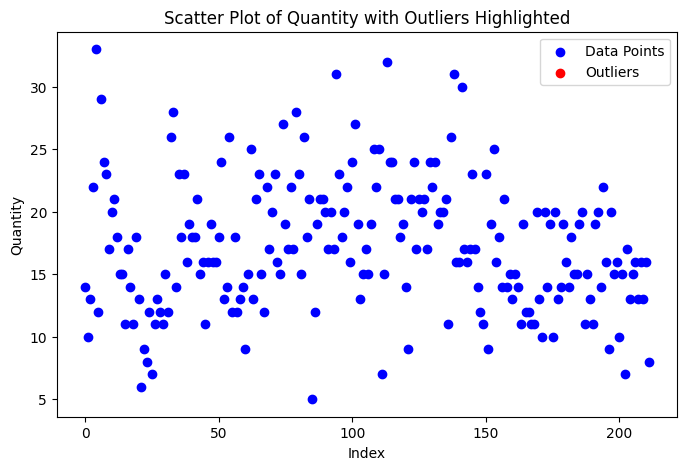

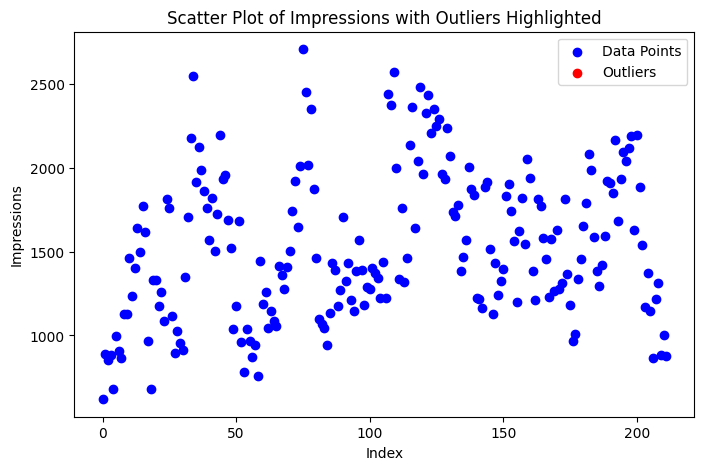

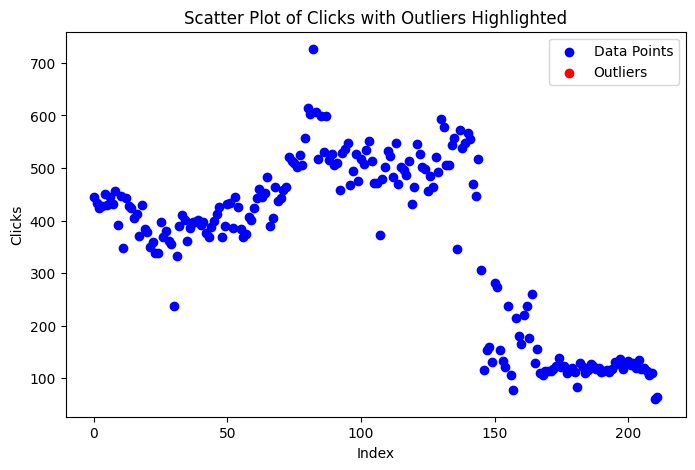

In [ ]:
import numpy as np

def detect_outliers_zscore(data, threshold=3):
    outliers = {}
    for col in data.select_dtypes(include=[np.number]).columns:
        mean = np.mean(data[col])
        std = np.std(data[col])
        z_scores = [(x - mean) / std for x in data[col]]
        outliers[col] = np.where(np.abs(z_scores) > threshold)
    return outliers

outliers_zscore = detect_outliers_zscore(data)
print(outliers_zscore)

for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 5))

    # Scatter plot of all data points
    plt.scatter(data.index, data[col], label='Data Points', color='blue')

    # Highlight the outliers
    outlier_indices = outliers_zscore[col]
    plt.scatter(outlier_indices, data.loc[outlier_indices, col], label='Outliers', color='red')

    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter Plot of {col} with Outliers Highlighted')
    plt.legend()
    plt.show()

Outliers

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data= pd.read_csv('merged_file.csv')

# Define a function to detect outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Apply the function to each column of interest
for column in ['Quantity', 'Impressions', 'Clicks']:
    outliers = detect_outliers(data, column)
    print(f"Outliers in {column}:\n", outliers)



Outliers in Quantity:
       Day Index  Quantity  Impressions  Clicks
4     12/5/2021        33          678     451
9    12/10/2021        38         1129     391
78    2/17/2022        38         2351     505
113   3/24/2022        32         1321     547
142   4/22/2022        36         1163     470
Outliers in Impressions:
 Empty DataFrame
Columns: [Day Index, Quantity, Impressions, Clicks]
Index: []
Outliers in Clicks:
 Empty DataFrame
Columns: [Day Index, Quantity, Impressions, Clicks]
Index: []


Replacing outliers with median

In [ ]:
import pandas as pd
import numpy as np
data= pd.read_csv('merged_file.csv')

# Function to replace outliers with median
def replace_outliers(data, threshold=3):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        mean = data[col].mean()
        std = data[col].std()
        outliers = (data[col] - mean).abs() > threshold * std
        median = data[col].median()
        data.loc[outliers, col] = median
    return data

# Replace outliers in the dataset
data_cleaned = replace_outliers(data)

# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv('cleaned_file.csv', index=False)

print("Outliers replaced and cleaned data saved to 'cleaned_file.csv'.")

Outliers replaced and cleaned data saved to 'cleaned_file.csv'.


<ipython-input-18-137b27d0741f>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '402.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[outliers, col] = median
